<a href="https://colab.research.google.com/github/Inazuma1002/Web-Science-Lab---Jan2024-Jun2024/blob/main/Notebooks/Temporal_Maternal_Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis Through Facebook Prophet model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split as tts

In [ ]:
!pip install fbprophet


In [ ]:
!pip install prophet


In [ ]:
import prophet

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ML/Excel sheets/Hospital_facilities_2018-22.xlsx')
data.head()


In [ ]:
data.describe()

,Sr no,\nF.R.U\n(First Referral Units),108 Ambulances_No. of Vehicles,108 Ambulances_No. of Patients benefited,\nNumber of 24/7 working Hospitals_Nos,\nNumber of 24/7 working Hospitals_No. of Delivaries occured in Hospitals,\nNo. of Benificiaries availed Janani Suraksha Yojana,No. of\nBeneficiaries received Madilu kit,\nMaternal Death
count,4.000000,4.0,4.00000,4.000000,4.0,4.000000,4.000000,4.0,4.000000
mean,2020.500000,11.0,56.50000,55029.250000,89.0,23523.500000,40122.250000,0.0,50.500000
std,1.290994,0.0,0.57735,13771.532991,0.0,29519.042334,14930.605645,0.0,7.593857
min,2019.000000,11.0,56.00000,42677.000000,89.0,8143.000000,22357.000000,0.0,43.000000
25%,2019.750000,11.0,56.00000,44552.750000,89.0,8297.500000,32125.000000,0.0,45.250000
50%,2020.500000,11.0,56.50000,52637.000000,89.0,9081.500000,40267.500000,0.0,49.500000
75%,2021.250000,11.0,57.00000,63113.500000,89.0,24307.500000,48264.750000,0.0,54.750000
max,2022.000000,11.0,57.00000,72166.000000,89.0,67788.000000,57597.000000,0.0,60.000000


In [ ]:
X_train,x_test,y_train,y_test = tts(data, data, test_size= 0.2)
X_train.head()

In [ ]:
data_train = X_train[['Sr no', '\nMaternal Death Original', '\nMaternal Death','108 Ambulances_No. of Patients benefited','\nNo. of Benificiaries availed Janani Suraksha Yojana','108 Ambulances_No. of Vehicles','\nNumber of 24/7 working Hospitals_Nos']]
data_train = data_train.rename(columns={'Sr no':'Year', '\nMaternal Death Original': 'Maternal Death Original', '\nMaternal Death': 'Maternal Death', '\nNo. of Benificiaries availed Janani Suraksha Yojana': 'No. of Benificiaries availed Janani Suraksha Yojana','\nNumber of 24/7 working Hospitals_Nos': 'Number of 24/7 working Hospitals_Nos'})
#data_train['Maternal Death'] = np.log(data_train['Maternal Death'])

# Adding a new column with fixed month and day
data_train['ds'] = pd.to_datetime(data_train['Year'], format='%Y').dt.strftime('%Y-%m-%d')
#data_train.set_index('ds', inplace=True)

# Now, 'date' is the index, so you should access it through the index
d_train = data_train[['ds','Maternal Death','108 Ambulances_No. of Patients benefited','No. of Benificiaries availed Janani Suraksha Yojana','108 Ambulances_No. of Vehicles','Number of 24/7 working Hospitals_Nos']]  # Exclude 'date' since it's now the index
d_train = d_train.rename(columns = {
    'Maternal Death':'y'
})
print(d_train)


           ds   y  108 Ambulances_No. of Patients benefited  \
0  2019-01-01  60                                     72166   
1  2020-01-01  53                                     60096   
2  2021-01-01  46                                     45178   

   No. of Benificiaries availed Janani Suraksha Yojana  \
0                                              22357     
1                                              57597     
2                                              45154     

   108 Ambulances_No. of Vehicles  Number of 24/7 working Hospitals_Nos  
0                              57                                    89  
1                              57                                    89  
2                              56                                    89  


In [ ]:
from prophet import Prophet
new_model = Prophet()
new_model.add_regressor('108 Ambulances_No. of Vehicles')
new_model.add_regressor('108 Ambulances_No. of Patients benefited')
new_model.add_regressor('No. of Benificiaries availed Janani Suraksha Yojana')

In [ ]:
new_model.fit(d_train)

In [ ]:
x_test
data_test = x_test[['Sr no', '\nMaternal Death Original', '\nMaternal Death','108 Ambulances_No. of Patients benefited','\nNo. of Benificiaries availed Janani Suraksha Yojana','108 Ambulances_No. of Vehicles','\nNumber of 24/7 working Hospitals_Nos']]
data_test = data_test.rename(columns={'Sr no':'Year', '\nMaternal Death Original': 'Maternal Death Original', '\nMaternal Death': 'Maternal Death', '\nNo. of Benificiaries availed Janani Suraksha Yojana': 'No. of Benificiaries availed Janani Suraksha Yojana','\nNumber of 24/7 working Hospitals_Nos': 'Number of 24/7 working Hospitals_Nos'})
#data_test['Maternal Death'] = np.log(data_test['Maternal Death'])

# Adding a new column with fixed month and day
data_test['ds'] = pd.to_datetime(data_test['Year'], format='%Y').dt.strftime('%Y-%m-%d')
#data_train.set_index('ds', inplace=True)

# Now, 'date' is the index, so you should access it through the index
d_test = data_test[['ds','Maternal Death','108 Ambulances_No. of Patients benefited','No. of Benificiaries availed Janani Suraksha Yojana','108 Ambulances_No. of Vehicles','Number of 24/7 working Hospitals_Nos']]  # Exclude 'date' since it's now the index
d_test = d_test.rename(columns = {
    'Maternal Death':'y'
})
print(d_test)


           ds   y  108 Ambulances_No. of Patients benefited  \
3  2022-01-01  43                                     42677   

   No. of Benificiaries availed Janani Suraksha Yojana  \
3                                              35381     

   108 Ambulances_No. of Vehicles  Number of 24/7 working Hospitals_Nos  
3                              56                                    89  


In [ ]:
forecast_data = new_model.predict(d_test)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,108 Ambulances_No. of Patients benefited,108 Ambulances_No. of Patients benefited_lower,108 Ambulances_No. of Patients benefited_upper,108 Ambulances_No. of Vehicles,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,22.922819,85.710298,85.710298,22.922819,22.922819,178.076044,178.076044,178.076044,-201.593393,...,-2.443663,-2.443663,-2.443663,65.231142,65.231142,65.231142,0.0,0.0,0.0,85.710298


In [ ]:
y_test

,Sr no,Districts,\nF.R.U\n(First Referral Units),108 Ambulances_No. of Vehicles,108 Ambulances_No. of Patients benefited,\nNumber of 24/7 working Hospitals_Nos,\nNumber of 24/7 working Hospitals_No. of Delivaries occured in Hospitals,\nNo. of Benificiaries availed Janani Suraksha Yojana,No. of\nBeneficiaries received Madilu kit,\nMaternal Death,\nMaternal Death Original
3,2022,Belagavi,11,56,42677,89,8349,35381,0,43,43


In [ ]:
print(new_model.params['beta'])


[[-1.28525    0.0491847 -1.03568    0.947562   2.54803   -0.202673
  -3.37839   -0.549189   3.51574    0.57535    0.0280317 -0.682952
   5.92082   -0.193455  -0.045173  -0.614733   7.79804    2.16288
  -1.08125   -0.404789   2.90975   -2.43621   -0.992942 ]]


Coefficient for '108 Ambulances_No. of Vehicles': -1.28525

Coefficient for '108 Ambulances_No. of Patients benefited': 0.0491847

Coefficient for 'No. of Benificiaries availed Janani Suraksha Yojana': -1.03568

These coefficients represent the estimated effect of each regressor on the target variable in the Prophet model. Positive coefficients indicate a positive association between the regressor and the target variable, while negative coefficients indicate a negative association.

For example, based on the coefficients provided:

1. An increase in the number of vehicles in the '108 Ambulances' category is associated with a decrease in the Maternal Death variable.

2. An increase in the number of patients benefited by '108 Ambulances' is associated with an increase in the Maternal Death.

3. An increase in the number of beneficiaries availing 'Janani Suraksha Yojana' is associated with a decrease in the Maternal Death.


# **Time Series Analysis Through ARIMA Model**

            \nMaternal Death
Sr no                       
2019-01-01                60
2020-01-01                53
2021-01-01                46
2022-01-01                43


<ipython-input-13-837fe4d17d4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_one['Sr no'] = pd.to_datetime(data_one['Sr no'], format='%Y').dt.strftime('%Y-%m-%d')


<Axes: xlabel='Sr no'>

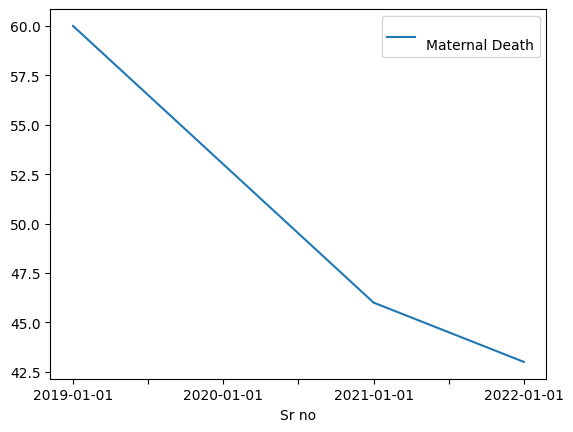

In [ ]:
data_one = data[['Sr no', '\nMaternal Death']]
data_one['Sr no'] = pd.to_datetime(data_one['Sr no'], format='%Y').dt.strftime('%Y-%m-%d')
data_one.set_index('Sr no', inplace = True)

print(data_one)
data_one.plot()

Now we plot Auto correlation function and partial autocorrelation functions to get a better understanding of how Maternal death(t) is related to Maternal death in past. S(t) = a0+ a1.S(t-1)+ a2.S(t-2)+ ......

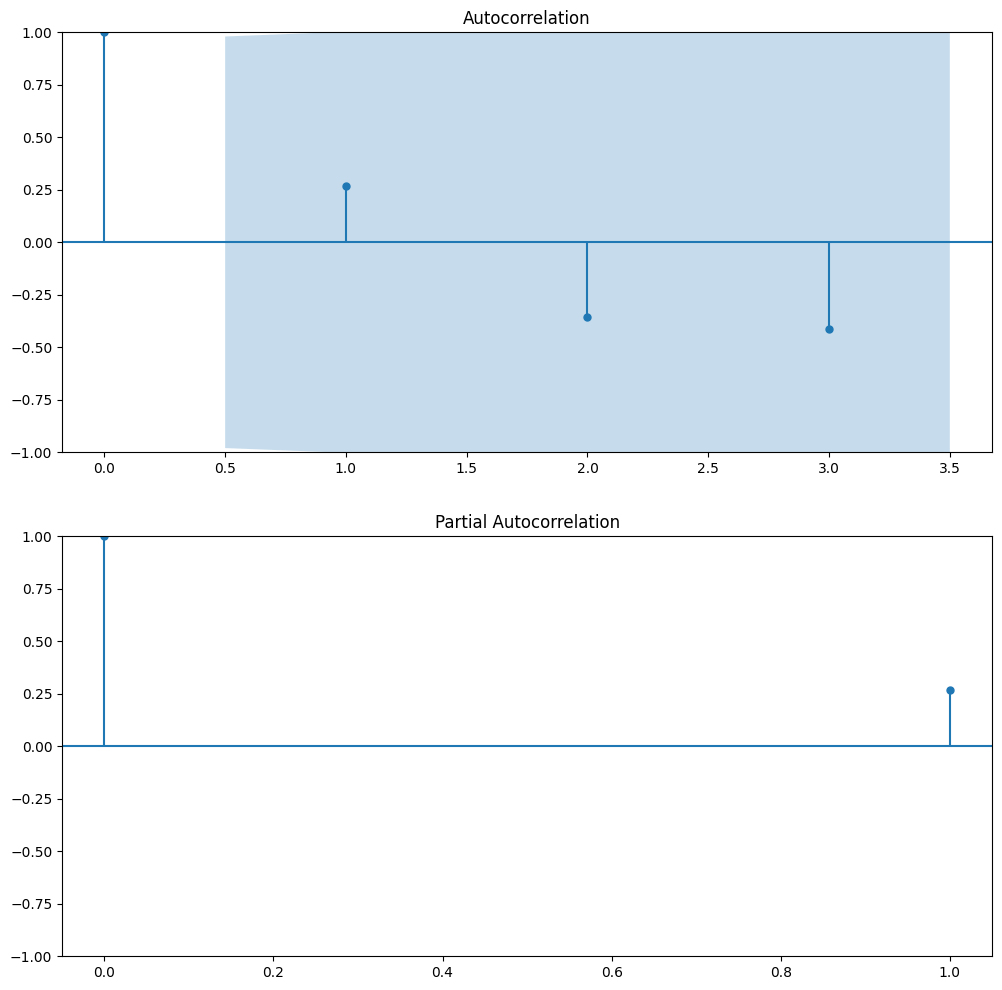

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_one['\nMaternal Death'],lags=3,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_one['\nMaternal Death'],lags=1,ax=ax2) #pacf could only be calculated upto 50% of sample size, since sample size is 4, I had to take 1 in lags.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_one['\nMaternal Death'],order=(1,1,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<ipython-input-26-d10149642b21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_one['forecast']=model_fit.predict(start=2,end=3,dynamic=True)


<Axes: xlabel='Sr no'>

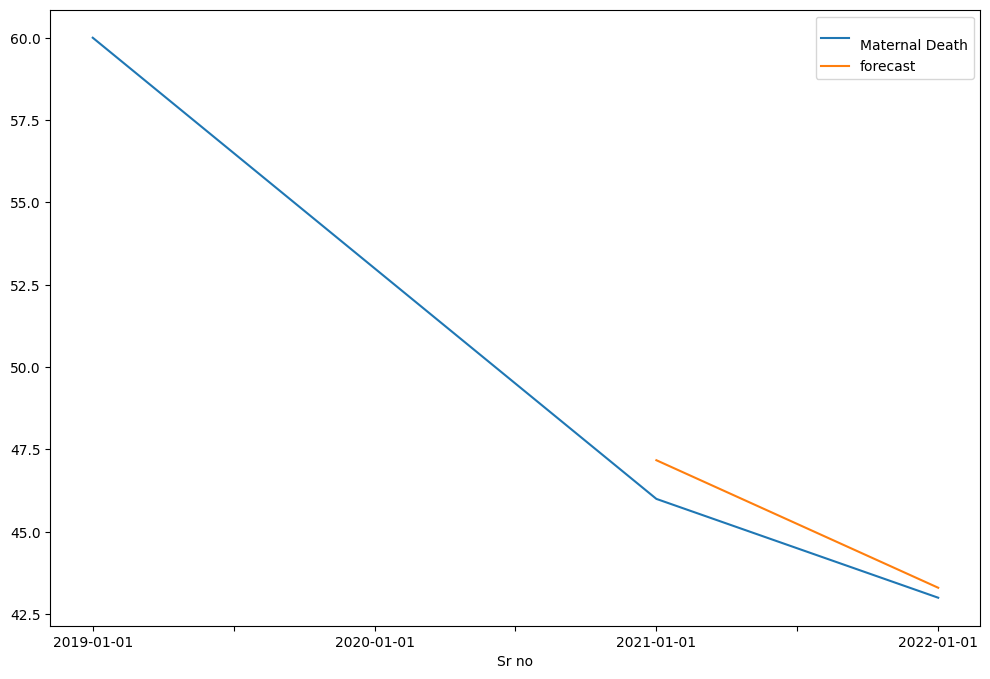

In [ ]:
data_one['forecast']=model_fit.predict(start=2,end=3,dynamic=True)
data_one[['\nMaternal Death','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset

# Convert index to datetime if it's not already in datetime format
data_one.index = pd.to_datetime(data_one.index)

# Generate future dates by adding DateOffset of x years
future_dates = [data_one.index[-1] + DateOffset(years=x) for x in range(0, 5)]


In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_one.columns)
future_datest_df.tail()

,\nMaternal Death,forecast
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN


In [ ]:
future_df=pd.concat([data_one,future_datest_df])
future_df


,\nMaternal Death,forecast
2019-01-01,60,NaN
2020-01-01,53,NaN
2021-01-01,46,47.174080
2022-01-01,43,43.302848
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN


<Axes: >

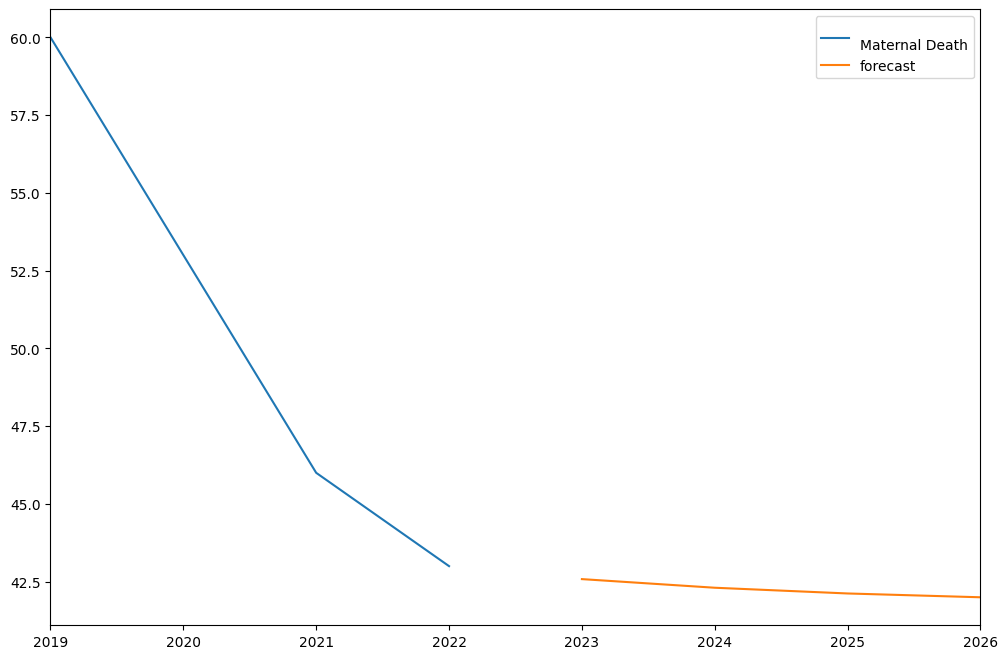

In [ ]:
future_df['forecast'] = model_fit.predict(start = 4, end = 7, dynamic= True)
future_df[['\nMaternal Death', 'forecast']].plot(figsize=(12, 8))